In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import metrics
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('features_rep.csv')

In [5]:
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '1

In [6]:
df.shape

(29452, 513)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,label
0,-0.114193,0.180711,0.349467,0.567677,0.343554,-0.476792,0.503344,0.482925,-0.462621,0.136693,...,-0.398593,-0.001034,-0.335969,0.856552,-0.158477,-0.349845,0.199385,0.331419,0.050204,0
1,-0.295818,-0.279723,0.898410,-0.093873,-0.068544,-0.155903,0.001103,0.873979,0.099372,-0.306599,...,0.279864,-0.112146,0.707446,-0.148069,-0.164078,-0.317907,-0.473865,0.127556,0.026406,0
2,-0.599102,-0.153469,-0.285542,-0.010906,0.186447,-0.410660,-0.044124,-0.357805,-0.036382,0.133819,...,-0.052587,-0.433729,-0.286950,0.128199,0.177232,0.488748,0.036320,0.184413,-0.457558,0
3,0.312241,-0.437902,-0.324559,-0.456228,-0.112724,-0.277492,-0.379832,-0.395910,0.120134,-0.095040,...,0.095117,-0.343859,0.284889,0.559849,-0.421915,0.129088,-0.042575,0.401339,-0.280539,0
4,-0.381651,-0.100388,0.066809,0.350780,-0.235437,-0.621862,-0.613681,-0.439923,-0.327604,-0.411732,...,0.190301,-0.434703,0.744278,0.140287,-0.414406,0.078920,-0.179400,-0.175216,-0.024499,0


In [7]:
df.isnull().sum()

0        0
1        0
2        0
3        0
4        0
        ..
508      0
509      0
510      0
511      0
label    0
Length: 513, dtype: int64

In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,label
count,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000,...,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000
mean,-0.130860,-0.105180,0.105614,-0.024109,-0.097388,-0.162353,-0.217101,-0.123469,-0.167898,0.155683,...,-0.135857,-0.115343,0.076378,0.018616,-0.299252,-0.240205,0.001384,0.022244,-0.209943,0.531034
std,0.383921,0.350404,0.490920,0.409684,0.360725,0.301624,0.383666,0.376772,0.411708,0.416642,...,0.473754,0.374937,0.384609,0.403386,0.337733,0.462423,0.327507,0.364222,0.383708,0.499044
min,-1.278415,-1.068420,-1.275961,-1.195582,-1.417442,-1.065488,-1.265570,-1.230226,-1.301783,-1.140187,...,-1.330981,-1.114028,-1.116091,-1.260166,-1.327350,-1.238114,-1.154247,-1.168186,-1.450495,0.000000
25%,-0.394684,-0.357068,-0.243476,-0.310378,-0.341991,-0.373523,-0.491868,-0.389313,-0.469003,-0.136735,...,-0.479533,-0.382747,-0.196863,-0.266462,-0.539201,-0.579285,-0.227811,-0.232984,-0.476239,0.000000
50%,-0.148518,-0.127568,0.084172,-0.043929,-0.103063,-0.182518,-0.240089,-0.142319,-0.195664,0.137964,...,-0.169604,-0.138928,0.058075,-0.001960,-0.320146,-0.284022,-0.014383,0.008812,-0.219190,1.000000
75%,0.116385,0.123045,0.431589,0.240209,0.142306,0.030132,0.029326,0.124228,0.102322,0.426075,...,0.165333,0.130988,0.335051,0.283259,-0.081822,0.056296,0.213507,0.259991,0.046063,1.000000
max,1.649866,1.452962,2.214637,1.692342,1.629461,1.444218,1.806994,1.659738,1.634966,2.530110,...,2.063115,1.653216,1.829618,1.991098,1.306731,2.231765,1.698005,1.768838,1.423670,1.000000


In [8]:
from bokeh.io import output_notebook
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.palettes import Spectral6
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot

In [15]:
output_notebook()

Loading BokehJS ...

In [31]:
from math import pi
Real_Fake = {'Real' : df['label'].value_counts()[1], 
                             'Fake' : df['label'].value_counts()[0]}

data = pd.Series(Real_Fake).reset_index(name = 'value').rename(columns = {'index':'Real'})
data['angle'] = data['value']/data['value'].sum() * 2 * pi
data['color'] = ['skyblue', 'salmon']
data

,Real,value,angle,color
0,Real,15640,3.336582,skyblue
1,Fake,13812,2.946603,salmon


In [32]:
p = figure(plot_height = 300, plot_width = 300, title = "Pie Chart", toolbar_location = None,
           tools = "hover", tooltips = "@Real: @value", x_range=(-0.5, 1.0))

p.wedge(x = 0, y = 1, radius = 0.4,
        start_angle = cumsum('angle', include_zero = True), end_angle = cumsum('angle'),
        line_color = "white", fill_color = 'color', legend_field = 'Real', source = data)
p.legend.location = "top_right"
p.legend.label_text_font_size = '5pt'

In [33]:
unique = ['Real', 'Fake']
top = [df['label'].value_counts()[1], df['label'].value_counts()[0]]
source = ColumnDataSource(data = dict(Real = unique, counts = top, color =['skyblue', 'salmon']))

In [34]:
show(gridplot([[p]]))

In [50]:
X= df.drop('label', axis = 1)
y = df['label']
X_traino, X_testo, y_traino, y_testo = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test

In [56]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, roc_auc_score,f1_score
import seaborn as sns
import matplotlib.pyplot as plt 

def evaluation(y_actual, predicted):
    cnf_matrix = confusion_matrix(y_actual, predicted)

    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    
    labels = ['Fake', 'Real']
    print(classification_report(y_actual, predicted, target_names = labels))

In [54]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200)

rfc.fit(X_traino, y_traino)

predict_rfc = rfc.predict(X_testo)



              precision    recall  f1-score   support

        Fake       0.96      0.89      0.92      4168
        Real       0.91      0.97      0.94      4668

    accuracy                           0.93      8836
   macro avg       0.93      0.93      0.93      8836
weighted avg       0.93      0.93      0.93      8836



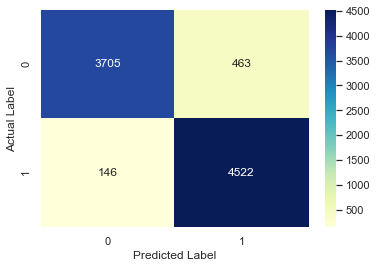

In [57]:
evaluation(y_testo, predict_rfc)

In [126]:
def pca_rf(x,y, n_pca = 60, kernel = 'poly', PC1 = 0, PC2 = 1):
    
    # standardize data
    x = StandardScaler().fit_transform(x)
    
    # PCA
    pca = PCA(n_components = n_pca)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents)
    PCA_df = pd.concat([principalDf, y], axis = 1)
    
    pca_x = PCA_df.drop('label', axis = 1).values
    pca_y = PCA_df['label'].values
    X_trainp,X_testp, y_trainp, y_testp = train_test_split(pca_x, pca_y, test_size=0.3,random_state=109) # 70% training and 30% test
    
    #Create a svm Classifier
    #clf = svm.SVC(kernel=kernel) # Polynomial Kernel
    #clf.fit(X_train, y_train)
    
    rfc = RandomForestClassifier(n_estimators = 250)

    rfc.fit(X_trainp,y_trainp)

    predict_rfcp= rfc.predict(X_testp)

    evaluation(y_testp , predict_rfcp)
    
    
    
    
    
    #Predict the response for test dataset
   
    #print("Accuracy:",metrics.accuracy_score(y_testp y_predp)
    #print("Precision:",metrics.precision_score(y_testp y_predp)
    #print("Recall:",metrics.recall_score(y_testp y_pred))
    
    
    #PCA_df["label"].replace({0: "Fake", 1: 'Real'}, inplace=True)
    # Scatter plot of PC0 and PC1
   # sns.scatterplot(x=PC1, y=PC2, data=PCA_df,  hue="label")
    #plt.title('PC0 vs PC1')
    # Set x-axis label
   # plt.xlabel('PC' + str(PC1))
    # Set y-axis label
    #plt.ylabel('PC' + str(PC2))
    

SVM

In [131]:
def pca_svm(x,y, n_pca = 60, kernel = 'poly', PC1 = 0, PC2 = 1):
    
    # standardize data
    x = StandardScaler().fit_transform(x)
    
    # PCA
    pca = PCA(n_components = n_pca)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents)
    PCA_df = pd.concat([principalDf, y], axis = 1)
    
    pca_x = PCA_df.drop('label', axis = 1).values
    pca_y = PCA_df['label'].values
    X_trainp,X_testp, y_trainp, y_testp = train_test_split(pca_x, pca_y, test_size=0.3,random_state=109) # 70% training and 30% test
    
    #Create a svm Classifier
    #clf = svm.SVC(kernel=kernel) # Polynomial Kernel
    #clf.fit(X_train, y_train)
    clf = svm.SVC(kernel=kernel) # Polynomial Kernel
    clf.fit(X_trainp, y_trainp)

    #Predict the response for test dataset
    y_predp = clf.predict(X_testp)
    evaluation(y_testp , y_predp)

In [132]:
# get last layer vector
vector_dense = pd.read_csv('features_rep.csv')
# shuffle
vector_dense = vector_dense.sample(frac=1).reset_index(drop=True)

In [133]:
xx = vector_dense.drop('label', axis = 1).values
yy = vector_dense['label']
  

              precision    recall  f1-score   support

        Fake       0.97      0.92      0.94      4161
        Real       0.93      0.98      0.95      4675

    accuracy                           0.95      8836
   macro avg       0.95      0.95      0.95      8836
weighted avg       0.95      0.95      0.95      8836



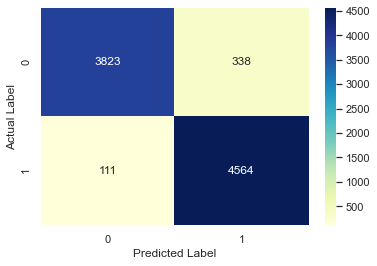

In [134]:
pca_rf(xx,yy) 

              precision    recall  f1-score   support

        Fake       0.98      0.97      0.97      4161
        Real       0.97      0.98      0.98      4675

    accuracy                           0.98      8836
   macro avg       0.98      0.98      0.98      8836
weighted avg       0.98      0.98      0.98      8836



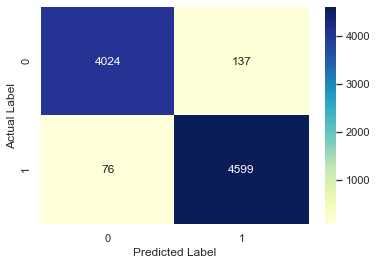

In [135]:
pca_svm(xx,yy)